<a href="https://colab.research.google.com/github/tunaemirkandemir/MLFinalProject/blob/main/ML_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Libraries


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    f1_score, accuracy_score, roc_auc_score, roc_curve
)

In [37]:
import seaborn as sns

###Read Data


In [38]:
df = pd.read_csv("data.csv", sep= ";")

###Exploration and Minor Changes


In [39]:
df.head()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [40]:
df.rename(columns={'Nacionality': 'Nationality'}, inplace=True)

In [41]:
df.shape
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [42]:
df.isnull().sum() #There are no missing values in the dataset.

,0
Marital status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance\t,0
Previous qualification,0
Previous qualification (grade),0
Nationality,0
Mother's qualification,0
Father's qualification,0


In [43]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nationality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [44]:
df = df[df['Target'] != 'Enrolled']

In [45]:
df[df['Target'] == 'Enrolled'].value_counts().sum()

np.int64(0)

In [46]:
df = pd.get_dummies(df, columns=['Target'])

In [47]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nationality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [48]:
df['Target_Dropout'].head()

,Target_Dropout
0,True
1,False
2,True
3,False
4,False


In [49]:
dummies_to_drop = ['Target_Graduate']
df.drop(columns=dummies_to_drop, inplace=True)
df.rename(columns={'Target_Dropout': 'Target'}, inplace=True)

#Make Plots and Find outliers

###Find outliers


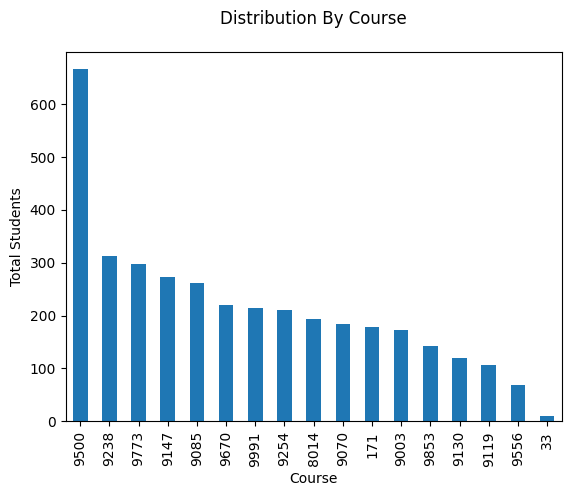

'\n33 - Biofuel Production Technologies\n171 - Animation and Multimedia Design\n8014 - Social Service (evening attendance)\n9003 - Agronomy\n9070 - Communication Design\n9085 - Veterinary Nursing\n9119 - Informatics Engineering\n9130 - Equinculture\n9147 - Management\n9238 - Social Service\n9254 - Tourism\n9500 - Nursing\n9556 - Oral Hygiene\n9670 - Advertising and Marketing Management\n9773 - Journalism and Communication\n9853 - Basic Education\n9991 - Management (evening attendance)\n'

In [50]:
plt.title("Distribution By Course", pad = 20)
plt.ylabel("Total Students")
df['Course'].value_counts().plot(kind='bar')
plt.show()
#Mapping of the X values
#Most of the students are nursing students and there are nearly no Biofuel Production Technologies students.
#Biofuel Production Technologies students may be extracted
'''
33 - Biofuel Production Technologies
171 - Animation and Multimedia Design
8014 - Social Service (evening attendance)
9003 - Agronomy
9070 - Communication Design
9085 - Veterinary Nursing
9119 - Informatics Engineering
9130 - Equinculture
9147 - Management
9238 - Social Service
9254 - Tourism
9500 - Nursing
9556 - Oral Hygiene
9670 - Advertising and Marketing Management
9773 - Journalism and Communication
9853 - Basic Education
9991 - Management (evening attendance)
'''

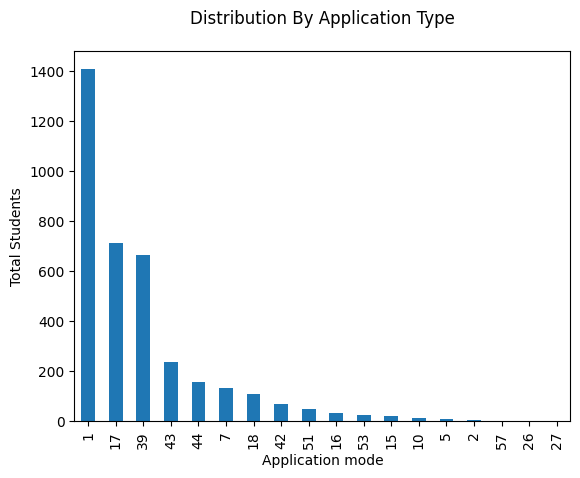

'\n1 - 1st phase - general contingent\n2 - Ordinance No. 612/93\n5 - 1st phase - special contingent (Azores Island)\n7 - Holders of other higher courses\n10 - Ordinance No. 854-B/99\n15 - International student (bachelor)\n16 - 1st phase - special contingent (Madeira Island)\n17 - 2nd phase - general contingent\n18 - 3rd phase - general contingent\n26 - Ordinance No. 533-A/99, item b2) (Different Plan)\n27 - Ordinance No. 533-A/99, item b3 (Other Institution)\n39 - Over 23 years old\n42 - Transfer\n43 - Change of course\n44 - Technological specialization diploma holders\n51 - Change of institution/course\n53 - Short cycle diploma holders\n57 - Change of institution/course (International)\n'

In [51]:
plt.title("Distribution By Application Type", pad = 20)
plt.ylabel("Total Students")
df['Application mode'].value_counts().plot(kind='bar')
plt.show()
#students' application type is impportant for giving insights but there are some application types that are highly rare and possibly outliers
'''
1 - 1st phase - general contingent
2 - Ordinance No. 612/93
5 - 1st phase - special contingent (Azores Island)
7 - Holders of other higher courses
10 - Ordinance No. 854-B/99
15 - International student (bachelor)
16 - 1st phase - special contingent (Madeira Island)
17 - 2nd phase - general contingent
18 - 3rd phase - general contingent
26 - Ordinance No. 533-A/99, item b2) (Different Plan)
27 - Ordinance No. 533-A/99, item b3 (Other Institution)
39 - Over 23 years old
42 - Transfer
43 - Change of course
44 - Technological specialization diploma holders
51 - Change of institution/course
53 - Short cycle diploma holders
57 - Change of institution/course (International)
'''

Dropping outliers

In [52]:
df_dropped = df[df['Course'] != 33]
df_dropped  = df_dropped[ (df_dropped['Application mode'] != 51)]
df_dropped  = df_dropped[ (df_dropped['Application mode'] != 16)]
df_dropped  = df_dropped[ (df_dropped['Application mode'] != 53)]
df_dropped  = df_dropped[ (df_dropped['Application mode'] != 15)]
df_dropped  = df_dropped[ (df_dropped['Application mode'] != 10)]
df_dropped  = df_dropped[ (df_dropped['Application mode'] != 5)]
df_dropped  = df_dropped[ (df_dropped['Application mode'] != 2)]
df_dropped  = df_dropped[ (df_dropped['Application mode'] != 57)]
df_dropped  = df_dropped[ (df_dropped['Application mode'] != 26)]
df_dropped  = df_dropped[ (df_dropped['Application mode'] != 27)]


In [53]:
df_dropped

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,True
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,True
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,False
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,False
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4418,1,44,1,9070,1,39,120.0,1,3,38,...,5,9,10,7,13.142857,1,16.2,0.3,-0.92,False
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,False
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,True
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,True


In [54]:
df = df_dropped

###Find correlations

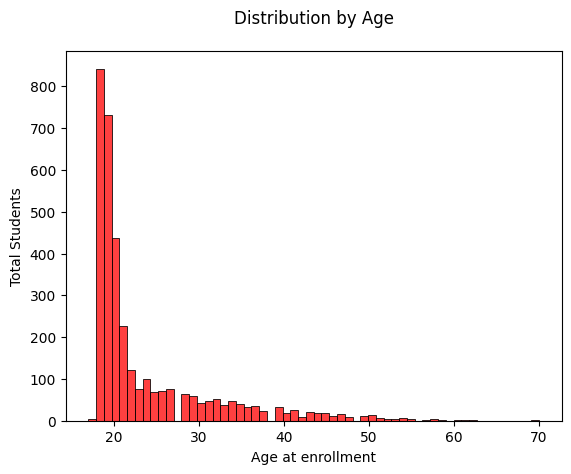

In [55]:
sns.histplot(df, x='Age at enrollment', color='red')
plt.title('Distribution by Age', pad=20)
plt.ylabel('Total Students')
plt.show()




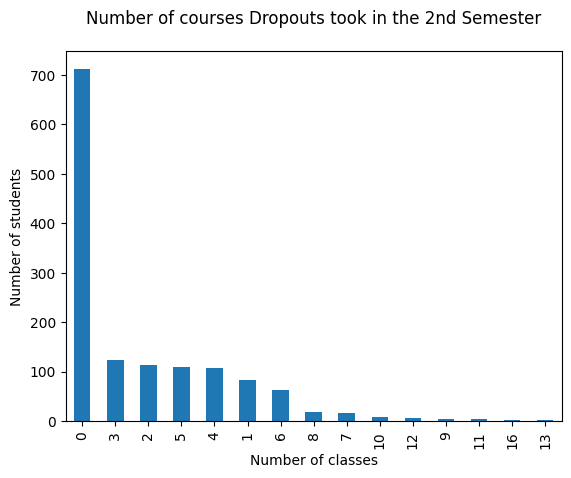

In [56]:
plt.title("Number of courses Dropouts took in the 2nd Semester", pad = 20)
number_of_classes_approved = df[df['Target'] == True ]['Curricular units 2nd sem (approved)'].sort_values(ascending=False).value_counts()
number_of_classes_approved.plot(kind='bar')
plt.ylabel("Number of students")
plt.xlabel('Number of classes')
plt.show()
#apparently dropout students' classes do not get approved in the second semester.

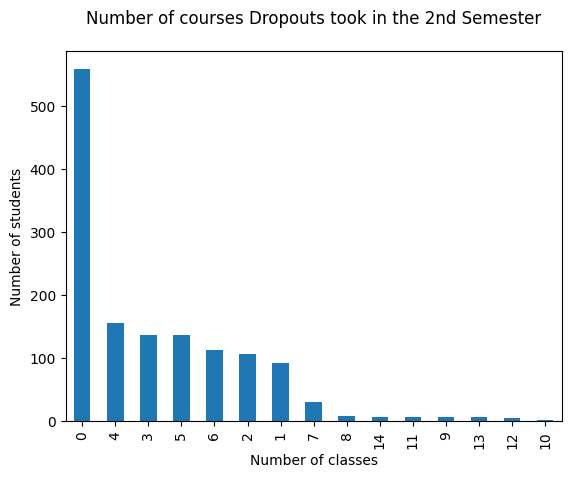

'\nCurricular units 2nd sem (approved)\nCurricular units 1st sem (approved)\n'

In [57]:
plt.title("Number of courses Dropouts took in the 2nd Semester", pad = 20)
number_of_classes_approved = df[df['Target'] == True ]['Curricular units 1st sem (approved)'].sort_values(ascending=False).value_counts()
number_of_classes_approved.plot(kind='bar')
plt.ylabel("Number of students")
plt.xlabel('Number of classes')
plt.show()
# dropout students' classes do not get approved in the first semester either. Additionally there is a great correlation between these two fields.
'''
Curricular units 2nd sem (approved)
Curricular units 1st sem (approved)
'''

<Axes: >

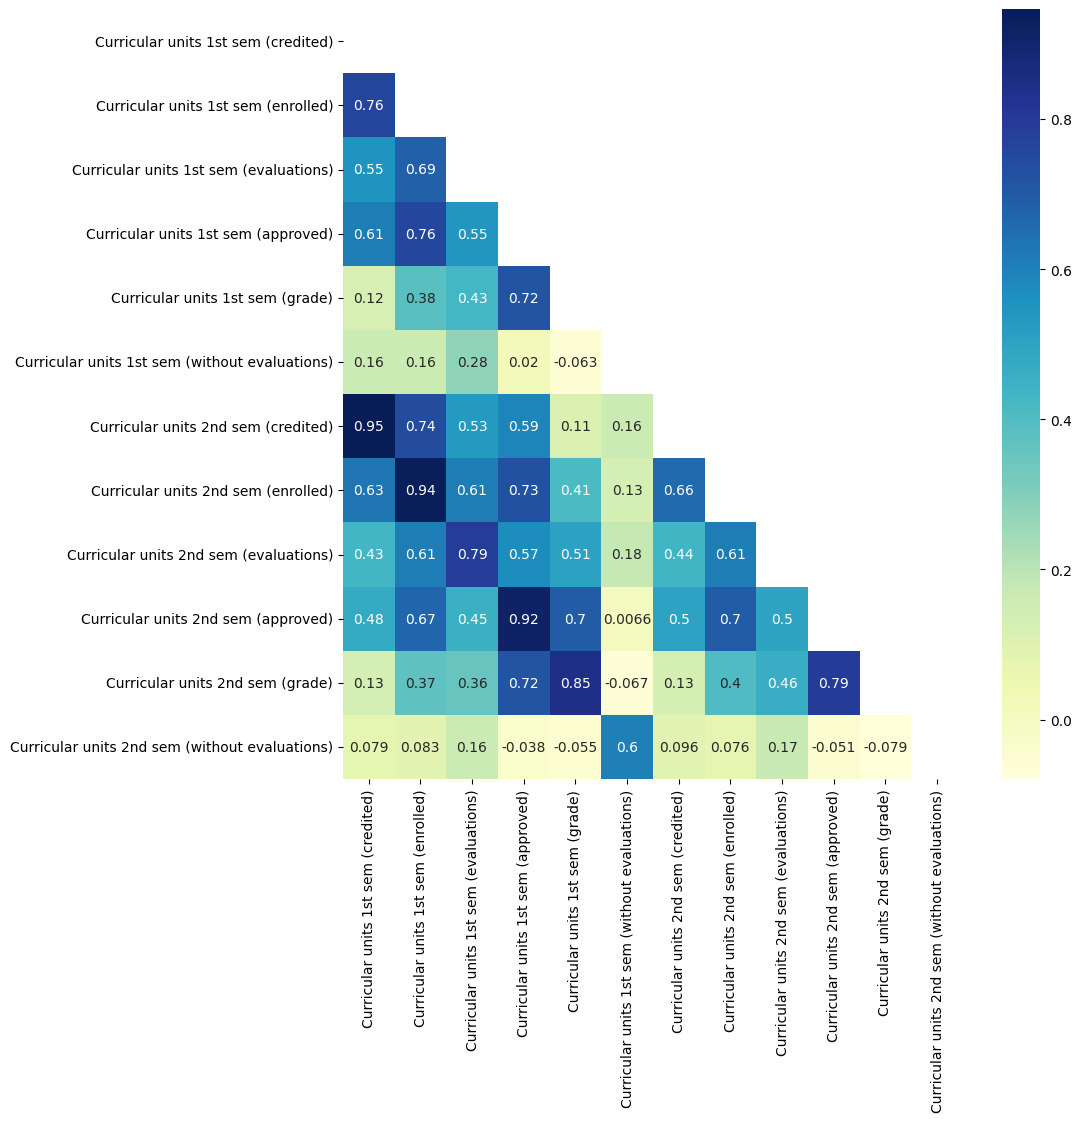

In [58]:
matrix_data_units = df[['Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)']].corr(numeric_only = True)

mask = np.triu(np.ones_like(matrix_data_units.corr()))
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(matrix_data_units, cmap="YlGnBu", annot=True, mask = mask, linewidths =0, ax = ax)
#There is apparently a large correlation between number of classes taken by students for both semesters.
#It may be logical to reduce the number of columns because of this large correlation


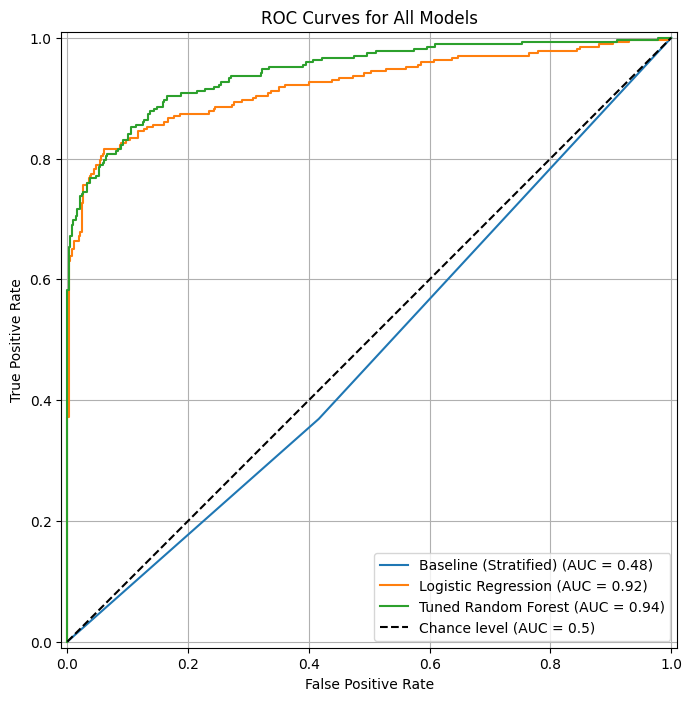

In [80]:
plt.figure(figsize=(10, 8))

# Plot ROC curve for each model
for name, model in models.items():
    RocCurveDisplay.from_estimator(
        model,
        X_test,
        y_test,
        name=name,
        ax=plt.gca() # Plot on the current active axes
    )

plt.plot([0, 1], [0, 1], 'k--', label='Chance level (AUC = 0.5)')
plt.title('ROC Curves for All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [59]:
df.columns


Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nationality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

###MİNMAX SCALER

In [60]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()

In [61]:
X_scaled = mm_scaler.fit_transform(df)

In [62]:
df[df.columns] = X_scaled
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0.0,0.372093,0.833333,0.000000,1.0,0.000000,0.284211,0.0,0.418605,0.255814,...,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.372093,0.488889,0.766182,1.0
2,0.0,0.000000,0.833333,0.906212,1.0,0.000000,0.284211,0.0,0.837209,0.837209,...,0.0,0.260870,0.000000,0.00,0.000000,0.000000,0.372093,0.488889,0.766182,1.0
3,0.0,0.372093,0.333333,0.977800,1.0,0.000000,0.284211,0.0,0.860465,0.837209,...,0.0,0.260870,0.303030,0.25,0.667692,0.000000,0.209302,0.000000,0.124174,0.0
4,0.2,0.883721,0.166667,0.798676,0.0,0.000000,0.052632,0.0,0.837209,0.860465,...,0.0,0.260870,0.181818,0.30,0.700000,0.000000,0.732558,0.111111,0.640687,0.0
5,0.2,0.883721,0.166667,1.000000,0.0,0.428571,0.401053,0.0,0.837209,0.837209,...,0.0,0.217391,0.515152,0.25,0.619231,0.416667,1.000000,0.244444,0.414795,0.0


In [63]:
df


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0.0,0.372093,0.833333,0.000000,1.0,0.000000,0.284211,0.000000,0.418605,0.255814,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.372093,0.488889,0.766182,1.0
2,0.0,0.000000,0.833333,0.906212,1.0,0.000000,0.284211,0.000000,0.837209,0.837209,...,0.000000,0.260870,0.000000,0.00,0.000000,0.000000,0.372093,0.488889,0.766182,1.0
3,0.0,0.372093,0.333333,0.977800,1.0,0.000000,0.284211,0.000000,0.860465,0.837209,...,0.000000,0.260870,0.303030,0.25,0.667692,0.000000,0.209302,0.000000,0.124174,0.0
4,0.2,0.883721,0.166667,0.798676,0.0,0.000000,0.052632,0.000000,0.837209,0.860465,...,0.000000,0.260870,0.181818,0.30,0.700000,0.000000,0.732558,0.111111,0.640687,0.0
5,0.2,0.883721,0.166667,1.000000,0.0,0.428571,0.401053,0.000000,0.837209,0.837209,...,0.000000,0.217391,0.515152,0.25,0.619231,0.416667,1.000000,0.244444,0.414795,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4418,0.0,1.000000,0.166667,0.906212,1.0,0.904762,0.263158,0.000000,0.046512,0.860465,...,0.263158,0.391304,0.303030,0.35,0.707692,0.083333,1.000000,0.244444,0.414795,0.0
4419,0.0,0.000000,1.000000,0.977800,1.0,0.000000,0.315789,0.000000,0.000000,0.000000,...,0.000000,0.260870,0.242424,0.25,0.682051,0.000000,0.918605,0.800000,0.000000,0.0
4420,0.0,0.000000,0.333333,0.977800,1.0,0.000000,0.263158,0.962963,0.000000,0.000000,...,0.000000,0.260870,0.181818,0.10,0.592308,0.000000,0.406977,0.311111,0.803170,1.0
4421,0.0,0.000000,0.166667,0.950000,1.0,0.000000,0.621053,0.000000,0.837209,0.837209,...,0.000000,0.347826,0.272727,0.05,0.726923,0.000000,0.732558,0.111111,0.640687,1.0


In [64]:
from sklearn.decomposition import PCA

# Identify the columns for PCA based on your previous correlation analysis
pca_columns = [
    'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)'
]

# Extract the relevant columns for PCA
df_pca = df[pca_columns].copy()

Now, let's apply PCA. We'll initially fit PCA without specifying the number of components to analyze the explained variance.

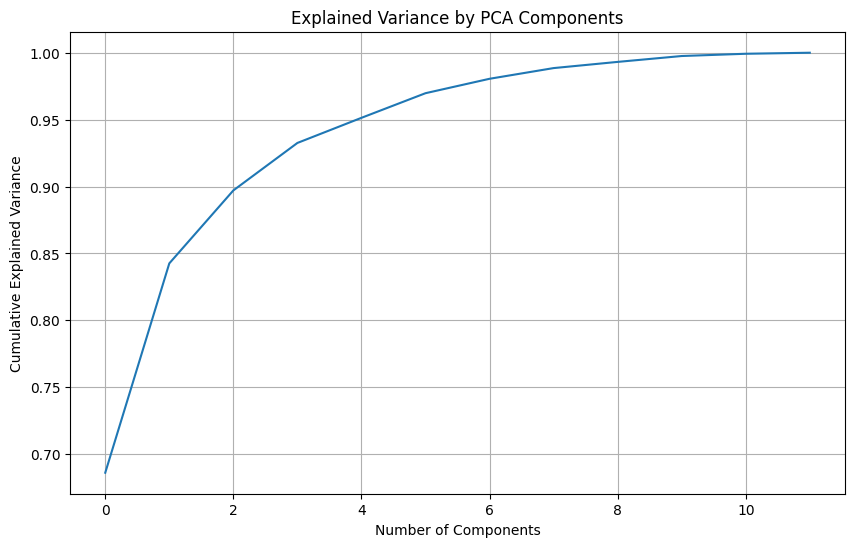

In [65]:
pca = PCA()
pca.fit(df_pca)

# Plot the explained variance ratio to help decide the number of components
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

The plot above shows how much variance is explained by increasing the number of principal components. You can decide on the number of components based on this plot (e.g., where the curve starts to flatten, or to retain a certain percentage of variance, like 90-95%).

Let's assume we choose to keep `n_components` components (e.g., 3 components from the graph, as the curve flattens around 3-4 components and captures most of the variance with minimal increase after).

I'll proceed with 3 components as an example. You can adjust `n_components` based on the plot if you need more or fewer components.

In [66]:
#n_components = 3 # Adjust this based on the explained variance plot

#pca_final = PCA(n_components=n_components)
#X_pca = pca_final.fit_transform(df_pca)

# Create a DataFrame for the PCA components
#pca_df = pd.DataFrame(data=X_pca, columns=[f'PC_{i+1}' for i in range(n_components)], index=df_pca.index)

# Drop the original correlated columns from the main DataFrame
#df = df.drop(columns=pca_columns)

# Concatenate the new PCA components with the main DataFrame
#df = pd.concat([df, pca_df], axis=1)

#df.head()

#Apply PCA Here
### extracted the columns that are highly correlated and applied Pca and finally added them back

In [79]:
from sklearn.decomposition import PCA

pca_columns = [
    'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)'
]
# The following lines are commented out because PCA has already been applied and merged into df.
# Attempting to re-run this would result in a KeyError as the original columns no longer exist in df.
# df_pca = df[pca_columns].copy()

# pca_exp = PCA()
# pca_exp.fit(df_pca)

# plt.figure(figsize=(10, 6))
# plt.plot(np.cumsum(pca_exp.explained_variance_ratio_))
# plt.xlabel('Number of Components')
# plt.ylabel('Cumulative Explained Variance')
# plt.title('Explained Variance by PCA Components')
# plt.grid(True)
# plt.show()

In [68]:
n_comp = 3
pca = PCA(n_components=n_comp)
X_pca = pca.fit_transform(df_pca)
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC_{i+1}' for i in range(n_comp)], index=df_pca.index)


df = df.drop(columns=pca_columns)
df = pd.concat([df, pca_df], axis=1)
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP,Target,PC_1,PC_2,PC_3
0,0.0,0.372093,0.833333,0.000000,1.0,0.000000,0.284211,0.0,0.418605,0.255814,...,0.0,0.056604,0.0,0.372093,0.488889,0.766182,1.0,-0.912626,-0.080698,-0.141797
2,0.0,0.000000,0.833333,0.906212,1.0,0.000000,0.284211,0.0,0.837209,0.837209,...,0.0,0.037736,0.0,0.372093,0.488889,0.766182,1.0,-0.850399,0.078460,-0.132980
3,0.0,0.372093,0.333333,0.977800,1.0,0.000000,0.284211,0.0,0.860465,0.837209,...,0.0,0.056604,0.0,0.209302,0.000000,0.124174,0.0,0.200320,-0.080491,0.049875
4,0.2,0.883721,0.166667,0.798676,0.0,0.000000,0.052632,0.0,0.837209,0.860465,...,0.0,0.528302,0.0,0.732558,0.111111,0.640687,0.0,0.176714,-0.097532,-0.055360
5,0.2,0.883721,0.166667,1.000000,0.0,0.428571,0.401053,0.0,0.837209,0.837209,...,0.0,0.622642,0.0,1.000000,0.244444,0.414795,0.0,0.138509,0.004217,0.172427


###Train Test Split

In [69]:
X = df.drop('Target', axis=1)
y = df['Target']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

###Cross Validation

In [71]:
cross_validation_strategy = StratifiedKFold(n_splits=5, shuffle = True, random_state = 42)

###Train Models


In [72]:
baseline = DummyClassifier(strategy='stratified', random_state=42)
baseline.fit(X_train, y_train)
y_pred_base = baseline.predict(X_test)

In [73]:
log_reg = LogisticRegression(max_iter=1000, multi_class='multinomial')
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [74]:
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=cross_validation_strategy,
    scoring='f1_macro',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

###Make Predictions

In [75]:


models = {
    "Baseline (Stratified)": baseline,
    "Logistic Regression": log_reg,
    "Tuned Random Forest": best_rf
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n--- {name} Performance ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"F1-Macro Score: {f1_score(y_test, y_pred, average='macro'):.4f}")
    print(classification_report(y_test, y_pred))


--- Baseline (Stratified) Performance ---
Accuracy: 0.5000
F1-Macro Score: 0.4763
              precision    recall  f1-score   support

         0.0       0.59      0.58      0.59       425
         1.0       0.36      0.37      0.36       271

    accuracy                           0.50       696
   macro avg       0.48      0.48      0.48       696
weighted avg       0.50      0.50      0.50       696


--- Logistic Regression Performance ---
Accuracy: 0.8894
F1-Macro Score: 0.8815
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91       425
         1.0       0.89      0.81      0.85       271

    accuracy                           0.89       696
   macro avg       0.89      0.88      0.88       696
weighted avg       0.89      0.89      0.89       696


--- Tuned Random Forest Performance ---
Accuracy: 0.8836
F1-Macro Score: 0.8752
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91   

###Confusion Matrix and ROC Curve

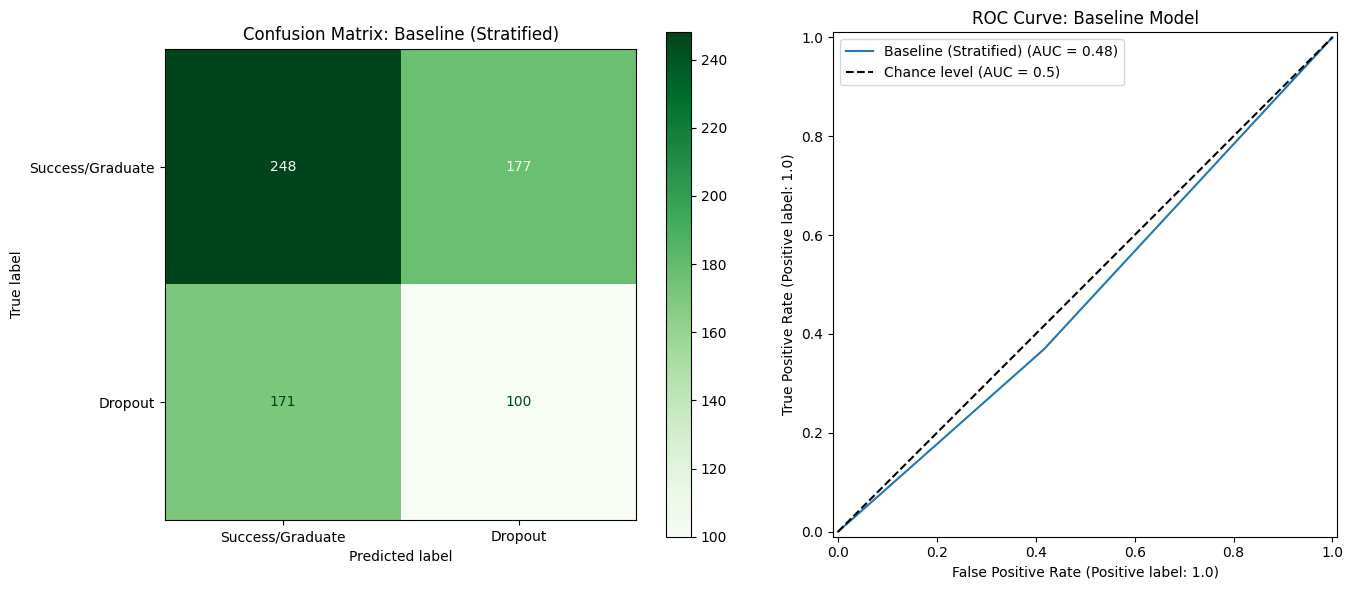

ROC-AUC Score: 0.4763


In [78]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
ConfusionMatrixDisplay.from_estimator(
    baseline,
    X_test,
    y_test,
    display_labels=['Success/Graduate', 'Dropout'],
    cmap='Greens',
    ax=ax1
)
ax1.set_title("Confusion Matrix: Baseline (Stratified)")

RocCurveDisplay.from_estimator(
    baseline,
    X_test,
    y_test,
    name="Baseline (Stratified)",
    ax=ax2
)

ax2.plot([0, 1], [0, 1], "k--", label="Chance level (AUC = 0.5)")
ax2.set_title("ROC Curve: Baseline Model")
ax2.legend()

plt.tight_layout()
plt.show()

y_prob = baseline.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")




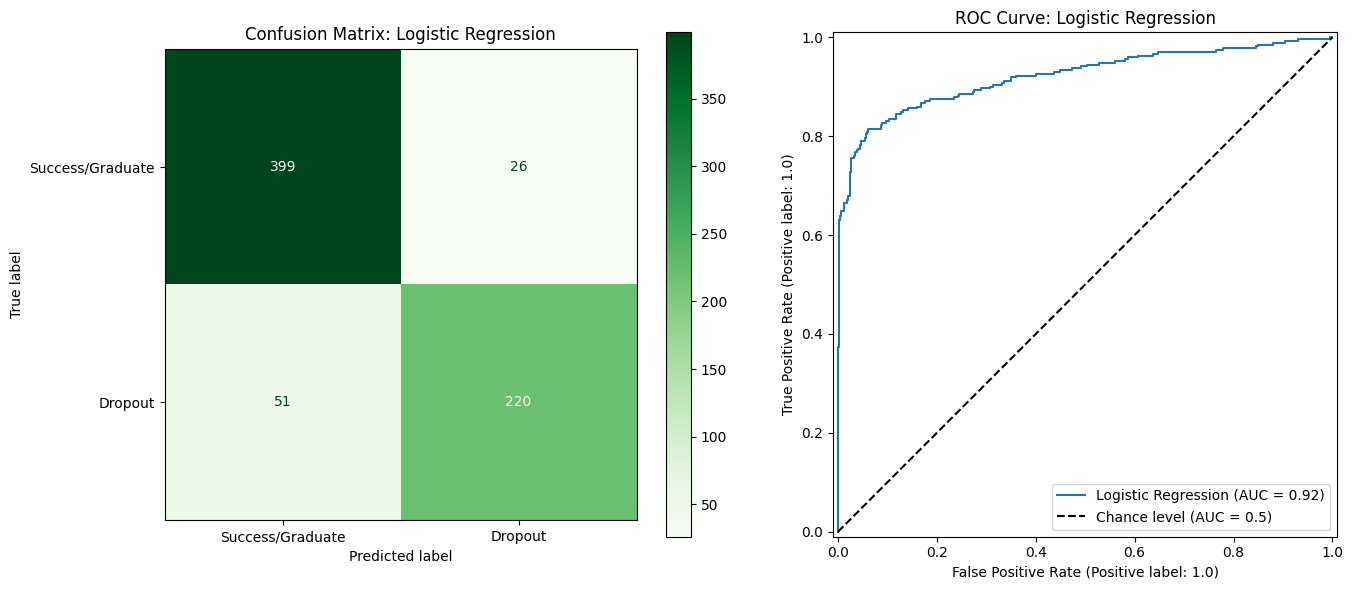

ROC-AUC Score: 0.9209


In [76]:
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, roc_auc_score
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ConfusionMatrixDisplay.from_estimator(
    log_reg,
    X_test,
    y_test,
    display_labels=['Success/Graduate', 'Dropout'],
    cmap='Greens',
    ax=ax1
)
ax1.set_title("Confusion Matrix: Logistic Regression")

RocCurveDisplay.from_estimator(
    log_reg,
    X_test,
    y_test,
    name="Logistic Regression",
    ax=ax2
)

ax2.plot([0, 1], [0, 1], "k--", label="Chance level (AUC = 0.5)")
ax2.set_title("ROC Curve: Logistic Regression")
ax2.legend()

plt.tight_layout()
plt.show()

y_prob = log_reg.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

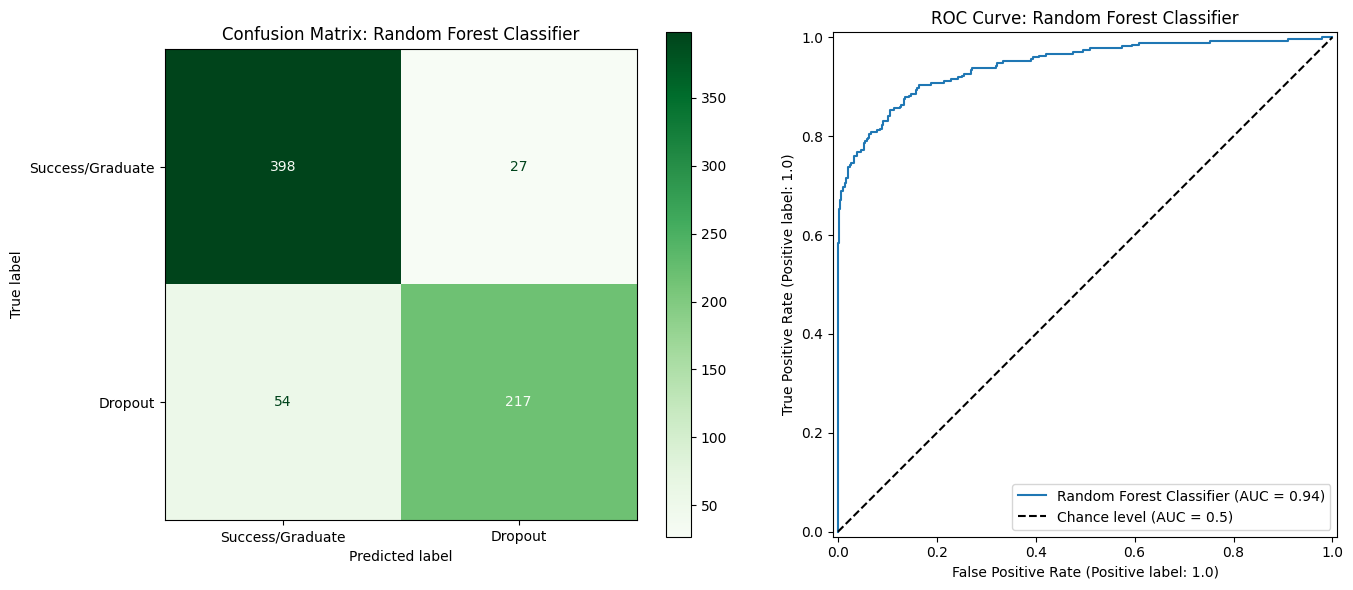

ROC-AUC Score: 0.9433


In [77]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ConfusionMatrixDisplay.from_estimator(
    best_rf,
    X_test,
    y_test,
    display_labels=['Success/Graduate', 'Dropout'],
    cmap='Greens',
    ax=ax1
)
ax1.set_title("Confusion Matrix: Random Forest Classifier")

RocCurveDisplay.from_estimator(
    best_rf,
    X_test,
    y_test,
    name="Random Forest Classifier",
    ax=ax2
)

ax2.plot([0, 1], [0, 1], "k--", label="Chance level (AUC = 0.5)")
ax2.set_title("ROC Curve: Random Forest Classifier")
ax2.legend()

plt.tight_layout()
plt.show()

y_prob = best_rf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

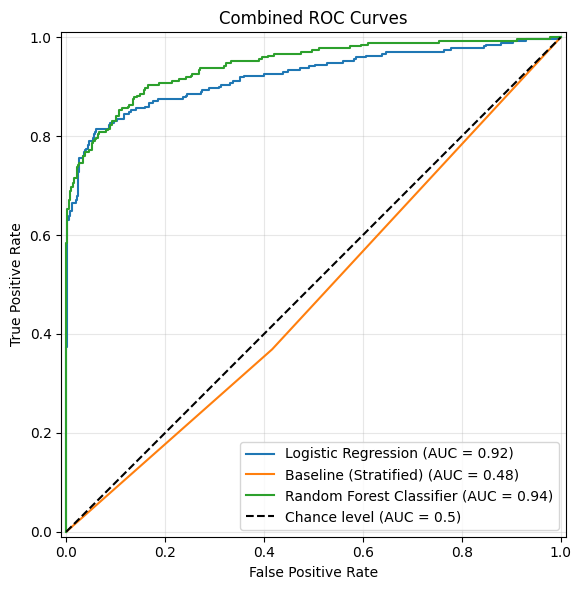

In [82]:
fig, ax = plt.subplots(figsize=(8, 6))

RocCurveDisplay.from_estimator(
    log_reg,
    X_test,
    y_test,
    name="Logistic Regression",
    ax=ax
)

RocCurveDisplay.from_estimator(
    baseline,
    X_test,
    y_test,
    name="Baseline (Stratified)",
    ax=ax
)

RocCurveDisplay.from_estimator(
    best_rf,
    X_test,
    y_test,
    name="Random Forest Classifier",
    ax=ax
)

ax.plot([0, 1], [0, 1], "k--", label="Chance level (AUC = 0.5)")

ax.set_title("Combined ROC Curves")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.legend(loc="lower right")
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()